# ***CAR PRICE PREDICTION - SUPERVISADO***

# **CPP - Random Forest Regressor - Supervisado**

In [1]:
# Predicción de precios de autos con Random Forest
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
# 2. Cargar dataset
!git clone https://github.com/suhasmaddali/Car-Prices-Prediction.git

# Cargar CSV
data = pd.read_csv("Car-Prices-Prediction/Data/data.csv")

print("Dimensiones del dataset:", data.shape)
print("Columnas disponibles:", data.columns)
data.head()

Cloning into 'Car-Prices-Prediction'...
remote: Enumerating objects: 780, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 780 (delta 33), reused 1 (delta 0), pack-reused 723 (from 1)
Receiving objects: 100% (780/780), 7.48 MiB | 18.40 MiB/s, done.
Resolving deltas: 100% (477/477), done.
Dimensiones del dataset: (11914, 16)
Columnas disponibles: Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
# 3. Preprocesamiento
# Eliminar valores nulos
data = data.dropna()

# Convertir variables categóricas a numéricas
# (ajusta columnas según el dataset real)
data = pd.get_dummies(data, drop_first=True)

In [4]:
# 4. Definir variables independientes (X) y dependiente (y)

# Suponiendo que 'Price' es la columna objetivo
X = data.drop("MSRP", axis=1)
y = data["MSRP"]

In [5]:
# 5. Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# 6. Entrenar modelo Random Forest
modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [7]:
# 7. Predicciones
y_pred = modelo.predict(X_test)

In [8]:
# 8. Evaluación del modelo

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Error Cuadrático Medio (MSE):", mse)
print("R² Score:", r2_score(y_test, y_pred)) #coeficiente de determinación
print("Error Absoluto Medio (MAE):", mean_absolute_error(y_test, y_pred))

Error Cuadrático Medio (MSE): 116071718.20208098
R² Score: 0.974326163605258
Error Absoluto Medio (MAE): 3589.7967093218194


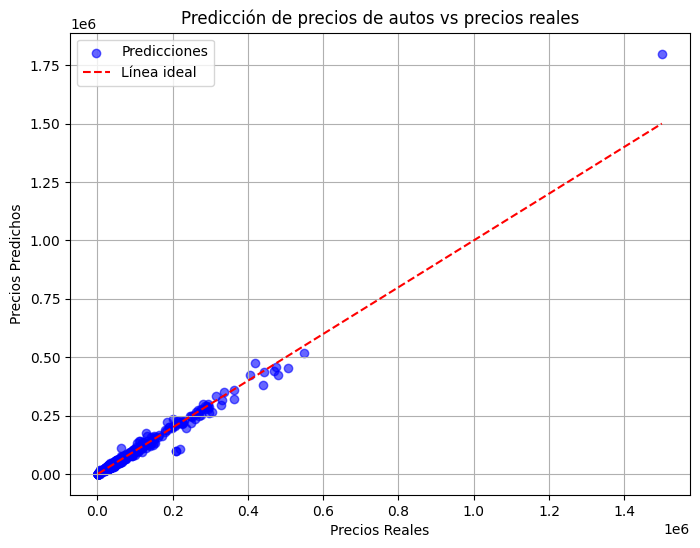

In [9]:
# 9. Visualización: valores reales vs predichos

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue", label="Predicciones")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color="red", linestyle="--", label="Línea ideal")

plt.xlabel("Precios Reales")
plt.ylabel("Precios Predichos")
plt.title("Predicción de precios de autos vs precios reales")
plt.legend()
plt.grid(True)
plt.show()


# **CPP - KNN regressor - Supervisado**

In [10]:
# Predicción de precios de autos con KNN

# 1. Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [11]:
# 2. Cargar dataset
!git clone https://github.com/suhasmaddali/Car-Prices-Prediction.git

# Cargar CSV
data = pd.read_csv("Car-Prices-Prediction/Data/data.csv")

print("Dimensiones del dataset:", data.shape)
print("Columnas disponibles:", data.columns)
data.head()

fatal: destination path 'Car-Prices-Prediction' already exists and is not an empty directory.
Dimensiones del dataset: (11914, 16)
Columnas disponibles: Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [12]:
# 3. Explorar datos
print("Primeras filas:")
print(data.head())
print("\nInformación del dataset:")
print(data.info())

Primeras filas:
  Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      C

In [13]:
# 4. Seleccionar variables (X) y etiqueta (y)
X = data.drop("MSRP", axis=1)
y = data["MSRP"]
#Codificar variables categóricas
X = pd.get_dummies(X, drop_first=True)
# Handle missing values by dropping rows with NaN
data_cleaned = data.dropna()

# Redefine X and y using the cleaned data
X = data_cleaned.drop("MSRP", axis=1)
y = data_cleaned["MSRP"]

# Re-apply get_dummies to the cleaned data
X = pd.get_dummies(X, drop_first=True)

In [14]:
# 5. Dividir en entrenamiento y prueba 80% - 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# 6. Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# 7. Crear y entrenar modelo KNN
knn = KNeighborsRegressor(n_neighbors=5)  # puedes ajustar el número de vecinos
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [17]:
# 8. Hacer predicciones
y_pred = knn.predict(X_test_scaled)

In [18]:
# 9. Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nResultados del modelo:")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")
print("Error Absoluto Medio (MAE):", mean_absolute_error(y_test, y_pred))


Resultados del modelo:
RMSE: 31675.09
R²: 0.78
Error Absoluto Medio (MAE): 8496.500803957946


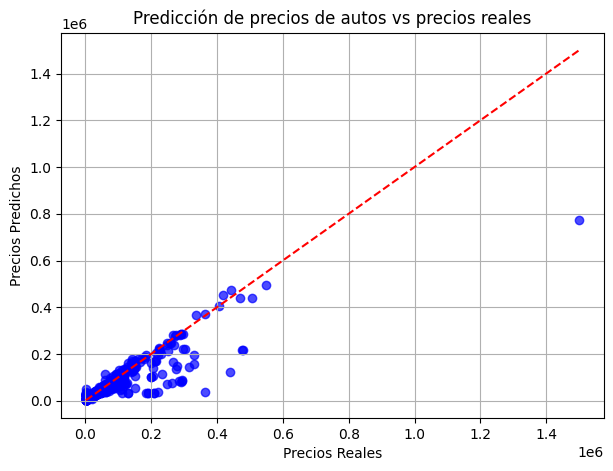

In [19]:
# 10. Visualizar valores reales vs predichos
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Precios Reales")
plt.ylabel("Precios Predichos")
plt.title("Predicción de precios de autos vs precios reales")
plt.grid(True)
plt.show()

# CPP - Linear regressor - Supervisado

In [20]:
# Usando Regresión Lineal Múltiple

# 1. Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [21]:
# 2. Cargar dataset
!git clone https://github.com/suhasmaddali/Car-Prices-Prediction.git

# Cargar CSV
data = pd.read_csv("Car-Prices-Prediction/Data/data.csv")

print("Dimensiones del dataset:", data.shape)
print("Columnas disponibles:", data.columns)
data.head()

fatal: destination path 'Car-Prices-Prediction' already exists and is not an empty directory.
Dimensiones del dataset: (11914, 16)
Columnas disponibles: Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [22]:
# 3. Exploración básica de datos
print("Dimensiones del dataset:", data.shape)
print("\nPrimeras filas:")
print(data.head())

print("\nInformación del dataset:")
print(data.info())

print("\nValores nulos por columna:")
print(data.isnull().sum())

Dimensiones del dataset: (11914, 16)

Primeras filas:
  Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factor

In [23]:
# 4. Selección de variables (ejemplo: eliminar columnas irrelevantes)
data = data.drop(["Model"], axis=1)

In [24]:
# 5. Variables categóricas → One-Hot Encoding
data = pd.get_dummies(data, drop_first=True)

In [25]:
# 6. Separar variables independientes (X) y dependiente (y)
X = data.drop("MSRP", axis=1)
y = data["MSRP"]

# Nota: Si hay variables categóricas, habría que aplicar get_dummies
X = pd.get_dummies(X, drop_first=True)

# Handle missing values by dropping rows with NaN
data_cleaned = data.dropna()

# Redefine X and y using the cleaned data
X = data_cleaned.drop("MSRP", axis=1)
y = data_cleaned["MSRP"]

# Re-apply get_dummies to the cleaned data
X = pd.get_dummies(X, drop_first=True)

In [26]:
# 7. División en entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [27]:
# 8. Entrenar modelo de Regresión Lineal Múltiple
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [28]:
# 9. Predicciones
y_pred = modelo.predict(X_test)

In [29]:
# 10. Evaluación del modelo
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nResultados del modelo:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")


Resultados del modelo:
RMSE: 16505.47
MAE: 8484.46
R²: 0.88


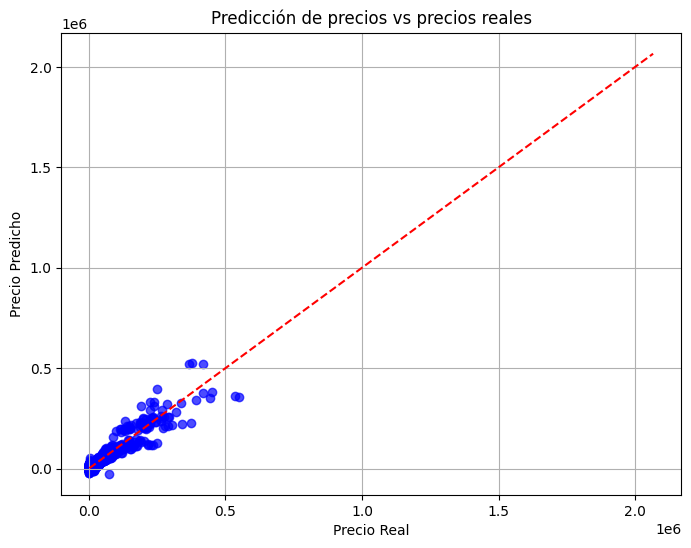

In [30]:
# 11. Comparación visual
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Predicción de precios vs precios reales")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--")
plt.grid(True)
plt.show()

# **CPP - MLP - Supervisado**

In [31]:
# 1. Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

In [32]:
# 2. Cargar dataset
!git clone https://github.com/suhasmaddali/Car-Prices-Prediction.git

# Cargar CSV
data = pd.read_csv("Car-Prices-Prediction/Data/data.csv")

print("Dimensiones del dataset:", data.shape)
print("Columnas disponibles:", data.columns)
data.head()

fatal: destination path 'Car-Prices-Prediction' already exists and is not an empty directory.
Dimensiones del dataset: (11914, 16)
Columnas disponibles: Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [33]:
# 3. Revisar columnas
print(data.head())

  Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         C

In [34]:
# 4. Definir variables predictoras (X) y variable objetivo (y)
X = data.drop("MSRP", axis=1)   # 'price' es la variable a predecir
y = data["MSRP"]

# Nota: Si hay variables categóricas, habría que aplicar get_dummies
X = pd.get_dummies(X, drop_first=True)

# Handle missing values by dropping rows with NaN
data_cleaned = data.dropna()

# Redefine X and y using the cleaned data
X = data_cleaned.drop("MSRP", axis=1)
y = data_cleaned["MSRP"]

# Re-apply get_dummies to the cleaned data
X = pd.get_dummies(X, drop_first=True)

In [35]:
# 5. Dividir en conjuntos de entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [36]:
# 6. Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
# 7. Definir y entrenar el modelo MLP Regressor
mlp = MLPRegressor(
    hidden_layer_sizes=(100,50),  # dos capas ocultas: 100 y 50 neuronas
    activation="relu",
    solver="adam",
    max_iter=1000,
    random_state=42
)
mlp.fit(X_train_scaled, y_train)

MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

In [38]:
# 8. Predicciones
y_pred = mlp.predict(X_test_scaled)

In [39]:
# 9. Evaluación del modelo
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Resultados del modelo:")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")
print(f"MAE: {mae:.2f}")

Resultados del modelo:
RMSE: 20988.50
R²: 0.90
MAE: 4921.92


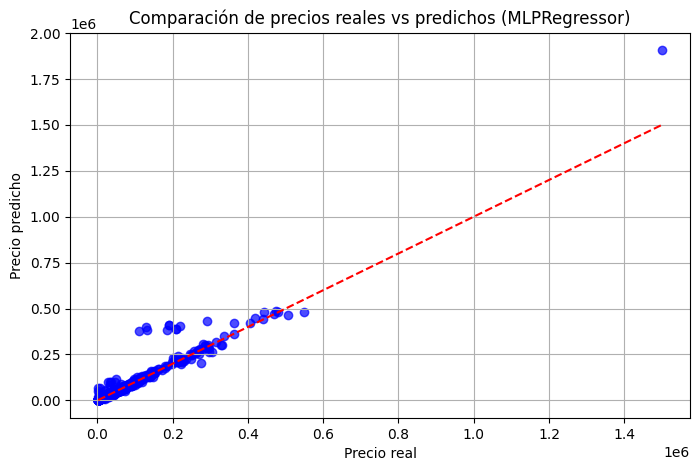

In [40]:
# 10. Visualización: precios reales vs predichos
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.title("Comparación de precios reales vs predichos (MLPRegressor)")
plt.grid(True)
plt.show()